In [1]:
import os
import pandas as pd

In [2]:
os.chdir("/home/matvey/data/LshCas13a_RNA_cleavage/LshCas13a_C3000/WT_TSS_calling_old_assembly/")

In [3]:
RegulonDB_TSS = "Annotation/RegulonDB_TSS_annotation.txt"

In [4]:
Header = ["LeftPos", "RightPos", "MaxFreqPos", "Length", "ReadsNumber", 
          "Strand", "Gene", "BN", "GeneStart", "GeneEnd", "Orientation"]
RegulonDB_TSS_DF = pd.read_csv(RegulonDB_TSS, sep="\t",comment="#", names=Header)
RegulonDB_TSS_DF

,LeftPos,RightPos,MaxFreqPos,Length,ReadsNumber,Strand,Gene,BN,GeneStart,GeneEnd,Orientation
0,2310676,2310676,2310676,1,3092254,forward,ompC,b2215,2309668.0,2310771.0,InAntiSense
1,3717908,3717914,3717912,7,3380643,forward,cspA,b3556,3718072.0,3718284.0,UpSenseExten
2,784812,784818,784815,7,2327842,forward,aroG,b0754,784856.0,785908.0,UpSense
3,4049057,4049063,4049059,7,1754833,forward,csrC,b4457,4049059.0,4049303.0,UpSense
4,781224,781229,781226,6,1155544,forward,nadA,b0750,781308.0,782351.0,UpSense
...,...,...,...,...,...,...,...,...,...,...,...
5192,709696,709696,709696,1,65,reverse,fur,b0683,709423.0,709869.0,InSense
5193,2639955,2639955,2639955,1,60,reverse,ispG,b2515,2638708.0,2639826.0,UpSense
5194,1249116,1249116,1249116,1,53,reverse,dhaL,b1199,1248348.0,1248980.0,UpSense
5195,3720573,3720573,3720573,1,41,reverse,glyS,b3559,3720351.0,3722420.0,InSense


In [5]:
WT_NT_TSS = "Results/Tables/TSS_detection_tables/NT_cells_TSS_predictions.tsv"
WT_NT_TSS_DF = pd.read_csv(WT_NT_TSS, sep="\t")
WT_NT_TSS_DF

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj
0,NC_000913.2,1403775,-,6.053556,10.430569,1.924795e+02,9.144005e-44,8.503924e-40
1,NC_000913.2,3446244,-,4.899009,8.238370,1.716730e+02,3.189861e-39,1.483285e-35
2,NC_000913.2,1840332,+,7.654662,4.170365,1.669385e+02,3.450305e-38,1.069595e-34
3,NC_000913.2,3579041,-,6.044022,5.165173,1.655515e+02,6.931823e-38,1.611649e-34
4,NC_000913.2,3646005,-,4.847360,8.029278,1.620750e+02,3.983827e-37,7.409919e-34
...,...,...,...,...,...,...,...,...
9295,NC_000913.2,1096871,-,-0.001227,5.438050,7.339334e-06,9.978384e-01,9.983433e-01
9296,NC_000913.2,106549,+,-0.000818,5.996207,5.213839e-06,9.981781e-01,9.985002e-01
9297,NC_000913.2,1755638,+,-0.000804,5.705686,3.611103e-06,9.984838e-01,9.986986e-01
9298,NC_000913.2,4587875,-,-0.000480,4.838283,1.970992e-06,9.988798e-01,9.989873e-01


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='PValue', ylabel='Count'>

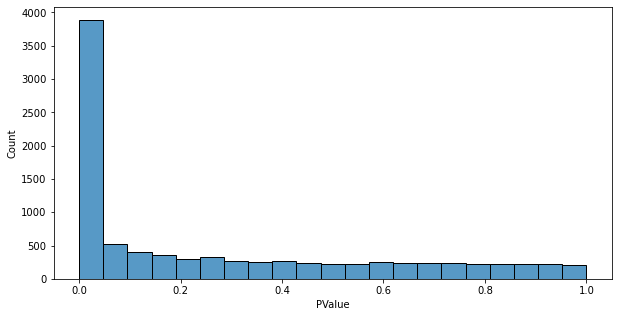

In [7]:
ax, figure = plt.subplots(figsize=(10,5))
sns.histplot(WT_NT_TSS_DF["PValue"])

<AxesSubplot:xlabel='PValue.adj', ylabel='Count'>

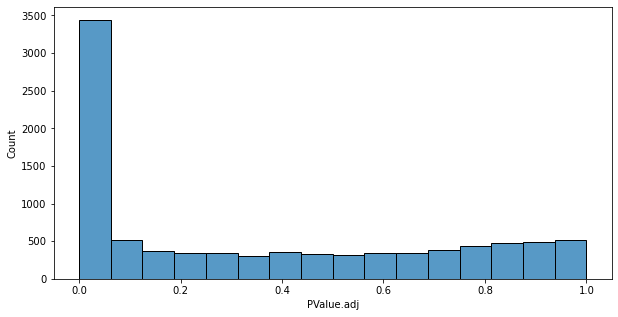

In [8]:
ax, figure = plt.subplots(figsize=(10,5))
sns.histplot(WT_NT_TSS_DF["PValue.adj"])

In [47]:
N=1000
WT_NT_TSS_DF_topN = WT_NT_TSS_DF.head(N)
len(WT_NT_TSS_DF_topN)

1000

In [48]:
def CheckOverlap(TestTurple, LeftPos, Right, Strand):
    StrandDict = {"forward" : "+", 
                  "reverse" : "-"}
    if StrandDict[Strand] != TestTurple.Strand:
        return False
    if LeftPos <= TestTurple.Pos <= Right:
        return True
    else:
        return False

In [49]:
OverlapDFs = list()
for Turple in WT_NT_TSS_DF_topN.itertuples():
    Overlap = RegulonDB_TSS_DF.loc[RegulonDB_TSS_DF.apply(lambda row: CheckOverlap(Turple, 
                                                                                   row["LeftPos"], 
                                                                                   row["RightPos"], 
                                                                                   row["Strand"]), 
                                                          axis=1)]
    if len(Overlap) > 0:
        OverlapDFs.append(Overlap)

In [50]:
OverlapLength = len(OverlapDFs)
OverlapLength

306

In [51]:
import numpy as np
from scipy.stats import fisher_exact

In [52]:
genome_length = 4639675*2
RegulonDB_length = np.sum(RegulonDB_TSS_DF["Length"])

ContTable = np.array([[OverlapLength, RegulonDB_length-OverlapLength], 
                      [1000-OverlapLength, genome_length-RegulonDB_length-1000+OverlapLength]])
ContTable

array([[    306,    6493],
       [    694, 9271857]])

In [53]:
oddsr, pvalue = fisher_exact(ContTable)
pvalue

0.0

In [54]:
from matplotlib_venn import venn2

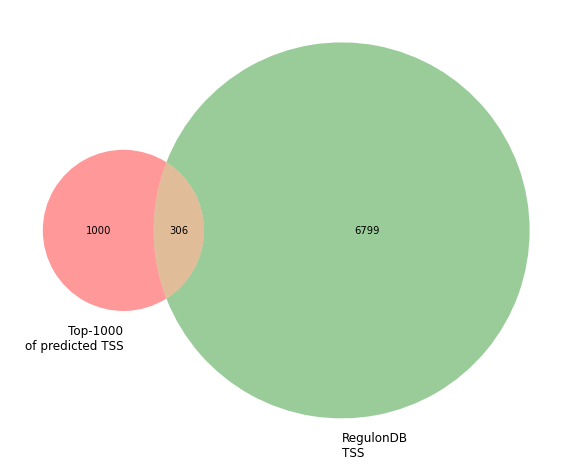

In [55]:
ax, figure = plt.subplots(figsize=(10,10))
venn2(subsets=(1000, RegulonDB_length, OverlapLength), set_labels=("Top-1000\nof predicted TSS", "RegulonDB\nTSS"))
plt.savefig("Results/Pictures/Predicted_TSS_vs_RegulonBD.png", dpi=300)

In [56]:
OverlapDFsConcat = pd.concat(OverlapDFs)

In [57]:
from collections import Counter

In [58]:
C = Counter()
for i in OverlapDFsConcat["Orientation"].tolist():
    C[i] += 1

In [59]:
RegulonDB_length

6799

In [61]:
OverlapDFsConcat.to_csv("Results/Tables/Verified_TSS.tsv", sep="\t", index=False)